# Fitting H$_2$O:Silicate areas in glasses
- This notebook shows how to quantify the relative area of the silicate peak and H$_2$O peak in glasses
- Please see example 4b if you want to quantify H$_2$O/silicate areas in unexposed olivine-hosted melt inclusions

## Import necessary python things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.41'

In [2]:
import os
DayFolder=os.getcwd()
spectra_path=DayFolder
file_ext='.txt'
filetype='headless_txt'

In [3]:
H2O_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, sort=False)
H2O_Files

['ETFS_OL39_MI7_50X_GLASS.txt']

### Select file
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
- Come back to here and change the i value

In [4]:
print('max i value='+str(len(H2O_Files)-1))

max i value=0


In [5]:
i=0
filename_H2O=H2O_Files[i]
print(filename_H2O)

ETFS_OL39_MI7_50X_GLASS.txt


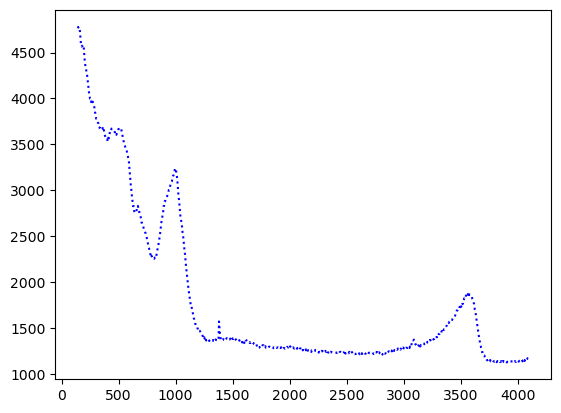

In [6]:
spectra_H2O=pf.get_data(path=spectra_path, filename=filename_H2O,
            Diad_files=None, filetype=filetype)
plt.plot(spectra_H2O[:, 0], spectra_H2O[:,1], ':b')

## Now lets quantify the area under the silicate region

In [11]:
config_silicate=pf.Sil_bck_pos_Schiavis_basalt()
config_silicate

Sil_bck_pos_Schiavis_basalt(lower_range_sil=(300, 340), mid_range1_sil=(630, 640), mid_range2_sil=(800, 830), upper_range_sil=(1200, 1250))

,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Silicate_Trapezoid_Area,Silicate_Simpson_Area
0,300,340,1200,1250,2,361125.823356,361134.084582


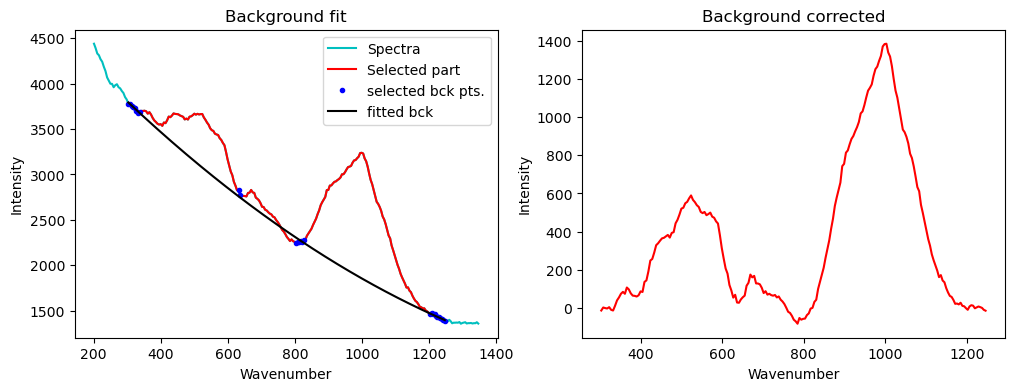

In [10]:
df_sil=pf.fit_area_for_silicate_region(Spectra=spectra_H2O, 
path=spectra_path, filename=filename_H2O, config1=config_silicate,
sigma_sil=5, exclude_range1_sil=None, exclude_range2_sil=None, 
N_poly_sil=2, plot_figure=True,
fit_sil='poly')
df_sil

## Now quantify the area under the water region

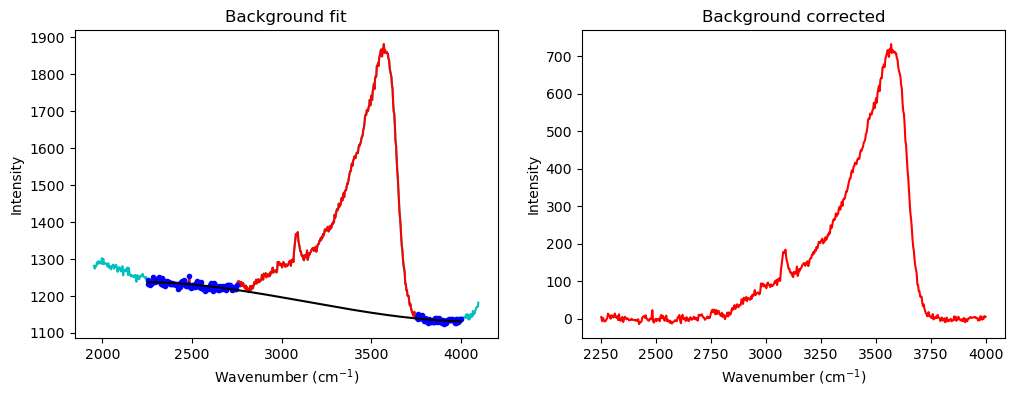

In [8]:
df_H2O=pf.fit_area_for_water_region(
path=spectra_path, filename=filename_H2O,
Spectra=spectra_H2O, lower_range_water=[2250, 2750], 
upper_range_water=[3750, 4000],
sigma_water=5, exclude_range1_water=None, exclude_range2_water=None,
N_poly_water=3, plot_figure=True, fit_water='poly')

In [10]:
combo_out=pf.stitch_dataframes_together(df_sil=df_sil, df_water=df_H2O, 
MI_file=filename_H2O)

In [11]:
combo_out

,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,ETFS_OL39_MI7_50X_GLASS.txt,0.524954,0.524734,280135.086929,280009.101422,533637.574052,533621.063702,200,300,1240,1500,2,2250,2750,3750,4000,3


### Click this and it will direct you in the TOC on the LHS

[Select file](#Select-file)

### Now go back and loop through as many files as you want, by changing i=...

## Once you've run all your files...
- Now stitch them, this code works by finding Stitching all the files together once you have them

In [26]:
csv_files2=pf.get_files(path=os.getcwd(), ID_str='Ol-H2O',
    sort=True, file_ext='csv')
csv_files2

['Ol-H2O combo, file0.csv',
 'Ol-H2O combo, file1.csv',
 'Ol-H2O combo, file2.csv',
 'Ol-H2O combo, file3.csv',
 'Ol-H2O combo, file4.csv',
 'Ol-H2O combo, file5.csv',
 'Ol-H2O combo, file6.csv',
 'Ol-H2O combo, file7.csv',
 'Ol-H2O combo, file8.csv']

### Now stitch data from all these CSVs together

In [27]:
df = pd.concat(
    map(pd.read_csv, csv_files2), ignore_index=True)
df

,Unnamed: 0,Olivine filename,MI filename,H2O_vs_Silicate_Area_Trapezoid,H2O_vs_Silicate_Area_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,0,03 CC14_MI2_Ol_96mw.txt,02 CC14_MI2_H2O_96mw.txt,0.385033,0.384900,2.110401e+05,2.109270e+05,5.481086e+05,5.480040e+05,200,300,1240,1500,2,2600,2750,3750,4100,2
1,0,06 CC13_MI4_Ol.txt,05 CC13_MI4_H2O.txt,0.356883,0.356977,2.016514e+05,2.016652e+05,5.650344e+05,5.649248e+05,200,300,1240,1500,2,2600,2750,3750,4100,2
2,0,10 CC9_MI3_Ol.txt,09 CC9_MI3_H2O.txt,0.381512,0.381749,3.822418e+05,3.822973e+05,1.001914e+06,1.001437e+06,200,300,1240,1500,2,2600,2750,3750,4100,2
3,0,16 CC9_MI1_Ol_50X.txt,12 CC9_MI1_H2O_20X.txt,0.691097,0.691153,2.659896e+05,2.659791e+05,3.848804e+05,3.848337e+05,200,300,1240,1500,2,2600,2750,3750,4100,2
4,0,16 CC9_MI1_Ol_50X.txt,15 CC9_MI1_H2O_50X.txt,0.415320,0.415619,2.006706e+05,2.007565e+05,4.831707e+05,4.830299e+05,200,300,1240,1500,2,2600,2750,3750,4100,2
5,0,19 CC5_MI1_Ol.txt,18 CC5_MI1_H2O_10mw.txt,0.472119,0.472046,4.406210e+05,4.402918e+05,9.332830e+05,9.327305e+05,200,300,1240,1500,2,2600,2750,3750,4100,2
6,0,22 CC7_MI3_Ol.txt,21 CC7_MI3_H2O.txt,0.358982,0.358259,3.399705e+05,3.393829e+05,9.470408e+05,9.473115e+05,200,300,1240,1500,2,2600,2750,3750,4100,2
7,0,25 CC4_MI1_Ol.txt,24 CC4_MI1_H2O.txt,0.450871,0.451595,3.800482e+06,3.803850e+06,8.429201e+06,8.423140e+06,200,300,1240,1500,2,2600,2750,3750,4100,2
8,0,30 MS13_2_MI1_Ol.txt,29 MS13_2_MI1_H2O.txt,0.096652,0.096509,8.935362e+04,8.907472e+04,9.244899e+05,9.229682e+05,200,300,1240,1500,2,2600,2750,3750,4100,2


### Now save to Excel

In [28]:
df.to_excel('H2O_Silicate_areas.xlsx')